# In this project we will perform:
### Data collection -> Data cleaning -> Data exploration  -> Data analysis

                                                    Data collected from Kaggle.com

In [2]:
# import required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# read the CSV files into DataFrames.
df_basic_data = pd.read_csv("data/car_basic_data.csv")
df_engine_data = pd.read_csv("data/car_engine_data.csv")


In [4]:
# Take a quick look at both dataframes
df_basic_data.head()

,car_ID,CarName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,price
0,1,alfa-romero giulia,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,13495.0
1,2,alfa-romero stelvio,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,16500.0
2,3,alfa-romero Quadrifoglio,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,16500.0
3,4,audi 100 ls,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,13950.0
4,5,audi 100ls,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,17450.0


In [5]:
df_engine_data.head()

,car_ID,enginetype,fueltype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,dohc,gas,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,dohc,gas,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,ohcv,gas,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,ohc,gas,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,ohc,gas,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [6]:
# Get the dataType of the df_basic_data DataFrame columns.

df_basic_data.dtypes
df_engine_data.dtypes

car_ID                int64
enginetype           object
fueltype             object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

In [7]:
# Count non-NA cells for each column in the df_engine_data DataFrame

df_engine_data.count()
df_basic_data.count()

car_ID            207
CarName           207
doornumber        207
carbody           207
drivewheel        207
enginelocation    207
wheelbase         207
carlength         207
carwidth          207
carheight         207
curbweight        207
price             207
dtype: int64

In [8]:
# Get the number of rows and columns in the df_basic_data DataFrame

df_basic_data.shape

(207, 12)

In [9]:
# Get the number of rows and columns in the df_engine_data DataFrame

df_engine_data.shape

(207, 13)

In [10]:
# Get the number of duplicated rows in the df_basic_data DataFrame

df_basic_data.duplicated().sum()

2

In [11]:
# drop the duplicate rows(from the original df_basic_data dataframe copy) and then confirm that they have been eliminated

df_basic_data.drop_duplicates(inplace=True)
df_basic_data.duplicated().sum()

0

In [12]:
# Get the number of duplicated rows in the df_engine_data DataFrame

df_engine_data.duplicated().sum()

2

In [13]:
# drop the duplicate rows(from the original df_engine_data dataframe copy) and then confirm that they have been eliminated

df_engine_data.drop_duplicates(inplace=True)
df_engine_data.duplicated().sum()

0

In [14]:
df_basic_data

,car_ID,CarName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,price
0,1,alfa-romero giulia,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,13495.0
1,2,alfa-romero stelvio,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,16500.0
2,3,alfa-romero Quadrifoglio,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,16500.0
3,4,audi 100 ls,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,13950.0
4,5,audi 100ls,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,201,volvo 145e (sw),four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,16845.0
203,202,volvo 144ea,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,19045.0
204,203,volvo 244dl,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,21485.0
205,204,volvo 246,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,22470.0


In [15]:
# split 'CarName' column into 'make' and 'model'
splitted_carName = df_basic_data['CarName'].str.split(n=1, expand=True)

# change the column names in the resulting dataframe to make and model instead of 0 and 1
splitted_carName.columns = ['make', 'model']

# confirm that the columns have been renamed
splitted_carName

,make,model
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
...,...,...
202,volvo,145e (sw)
203,volvo,144ea
204,volvo,244dl
205,volvo,246


In [16]:
# drop the CarName column from the original dataframe copy

df_basic_data.drop('CarName', axis=1, inplace=True)

In [17]:
df_basic_data

,car_ID,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,price
0,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,13495.0
1,2,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,16500.0
2,3,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,16500.0
3,4,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,13950.0
4,5,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
202,201,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,16845.0
203,202,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,19045.0
204,203,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,21485.0
205,204,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,22470.0


In [18]:
# print the shape of df_basic_data and splitted_carName dataframes

print(df_basic_data.shape, splitted_carName.shape)

(205, 11) (205, 2)


In [19]:
# merge df_basic_data and splitted_carName dataframes

df_basic_data = df_basic_data.merge(splitted_carName, left_index=True, right_index=True)
df_basic_data

,car_ID,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,price,make,model
0,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,13495.0,alfa-romero,giulia
1,2,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,16500.0,alfa-romero,stelvio
2,3,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,16500.0,alfa-romero,Quadrifoglio
3,4,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,13950.0,audi,100 ls
4,5,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,201,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,16845.0,volvo,145e (sw)
203,202,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,19045.0,volvo,144ea
204,203,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,21485.0,volvo,244dl
205,204,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,22470.0,volvo,246


In [20]:
# print out the df_basic_data columns as a python list[]

df_basic_data.columns.to_list()

['car_ID',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'price',
 'make',
 'model']

In [21]:
# reorder the columns such that the make and model columns are right after the car_ID column
df_basic_data = df_basic_data[
[
 'car_ID',
 'make',
 'model',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'price'
 ]
 ]

In [22]:
# confirm that the columns have been reordered

df_basic_data.columns.to_list()

['car_ID',
 'make',
 'model',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'price']

In [23]:
# take a look at the df_engine_data dataframe

print(df_basic_data.shape, df_engine_data.shape)

(205, 13) (205, 13)


In [24]:
df_engine_data

,car_ID,enginetype,fueltype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,dohc,gas,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,dohc,gas,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,ohcv,gas,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,ohc,gas,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,ohc,gas,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,201,ohc,gas,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
203,202,ohc,gas,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
204,203,ohcv,gas,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
205,204,ohc,diesel,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [25]:
# merge the df_basic_data and df_engine_data dataframes on a common column

df_basic_and_engine = df_basic_data.merge(df_engine_data, on=['car_ID','car_ID'])
df_basic_and_engine

,car_ID,make,model,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,alfa-romero,giulia,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,alfa-romero,stelvio,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,alfa-romero,Quadrifoglio,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,audi,100 ls,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,audi,100ls,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo,145e (sw),four,sedan,rwd,front,109.1,188.8,68.9,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,volvo,144ea,four,sedan,rwd,front,109.1,188.8,68.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,volvo,244dl,four,sedan,rwd,front,109.1,188.8,68.9,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,volvo,246,four,sedan,rwd,front,109.1,188.8,68.9,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [26]:
# get descriptive stats about the merged dataframe and store the resulting dataframe in a new variable(desc_stats)

desc_stats = df_basic_and_engine.describe()
desc_stats

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,price,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,13276.710571,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,7988.852332,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,5118.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,7788.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,10295.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,16503.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,45400.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [31]:
# MAP function
# 2 -> 4
# 5 -> 25
# 7 -> 49

def mapper(x):
    temp = x+2
    return temp

s = pd.Series([2,3,4])
s = s.map(mapper)
#-------------------------------------

s2 = pd.Series(['orange', 'apple'])
mapper_dict = {'orange':'orange juice', 'apple':'apple pie'}
s2 = s2.map(mapper_dict)
s2

0    orange juice
1       apple pie
dtype: object

In [34]:
format_pattern = "{:.4f}"
format_num = format_pattern.format(2.234)

print(format_num)

2.2340


In [35]:
# change the number format for the price column to two decimal places and add a $ sign before each value

desc_stats['price'] = desc_stats['price'].map("${:,.2f}".format)


In [36]:
desc_stats

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,price,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,$205.00,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,"$13,276.71",126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,"$7,988.85",41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,"$5,118.00",61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,"$7,788.00",97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,"$10,295.00",120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,"$16,503.00",141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,"$45,400.00",326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [38]:
# loop through the columns in the desc_stats dataframe and change the number format to only one decimal place
desc_stats_columns = desc_stats.columns
desc_stats_columns

for col in desc_stats_columns:
    if(col != 'price'):
        desc_stats[col] = desc_stats[col].map("{:.1f}".format)

In [39]:
# confirm that the formatting have been applied

desc_stats

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,price,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.0,205.0,205.0,205.0,205.0,205.0,$205.00,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,103.0,98.8,174.0,65.9,53.7,2555.6,"$13,276.71",126.9,3.3,3.3,10.1,104.1,5125.1,25.2,30.8
std,59.3,6.0,12.3,2.1,2.4,520.7,"$7,988.85",41.6,0.3,0.3,4.0,39.5,477.0,6.5,6.9
min,1.0,86.6,141.1,60.3,47.8,1488.0,"$5,118.00",61.0,2.5,2.1,7.0,48.0,4150.0,13.0,16.0
25%,52.0,94.5,166.3,64.1,52.0,2145.0,"$7,788.00",97.0,3.1,3.1,8.6,70.0,4800.0,19.0,25.0
50%,103.0,97.0,173.2,65.5,54.1,2414.0,"$10,295.00",120.0,3.3,3.3,9.0,95.0,5200.0,24.0,30.0
75%,154.0,102.4,183.1,66.9,55.5,2935.0,"$16,503.00",141.0,3.6,3.4,9.4,116.0,5500.0,30.0,34.0
max,205.0,120.9,208.1,72.3,59.8,4066.0,"$45,400.00",326.0,3.9,4.2,23.0,288.0,6600.0,49.0,54.0


array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>,
        <AxesSubplot:title={'center':'carwidth'}>],
       [<AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>, <AxesSubplot:>]],
      dtype=object)

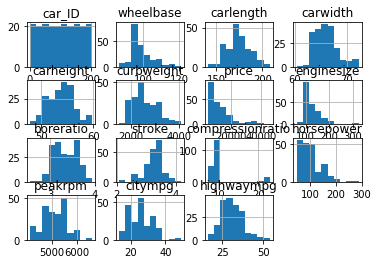

In [40]:
# display a histogram for each column in the df_basic_and_engine dataframe

df_basic_and_engine.hist()

In [44]:
# group the cars in the df_basic_and_engine dataframe by both the make&model and apply the count method

make_model_counts = df_basic_and_engine.groupby(['make', 'model']).count()
make_model_counts_df = pd.DataFrame(make_model_counts['car_ID'])
make_model_counts_df.head(50)


car_ID
make        model                            
Nissan      versa                           1
alfa-romero Quadrifoglio                    1
            giulia                          1
            stelvio                         1
audi        100 ls                          1
            100ls                           2
            4000                            1
            5000                            1
            5000s (diesel)                  1
            fox                             1
bmw         320i                            2
            x1                              1
            x3                              2
            x4                              1
            x5                              1
            z4                              1
buick       century                         1
            century luxus (sw)              1
            century special                 1
            electra 225 custom              1
            opel isuzu deluxe               1
            regal sport coupe (turbo)       1
            skyhawk                         1
            skylark                         1
chevrolet   impala                          1
            monte carlo                     1
            vega 2300                       1
dodge       challenger se                   1
            colt (sw)                       1
            colt hardtop                    1
            coronet custom                  1
            coronet custom (sw)             1
            d200                            1
            dart custom                     1
            monaco (sw)                     1
            rampage                         1
honda       accord                          2
            accord cvcc                     1
            accord lx                       1
            civic                           3
            civic (auto)                    1
            civic 1300                      1
            civic 1500 gl                   1
            civic cvcc                      2
            prelude                         1
isuzu       D-Max                           2
            D-Max V-Cross                   1
            MU-X                            1
jaguar      xf                              1
            xj                              1

In [48]:
# get the 'make', 'model', and 'price' columns and sort the resulting df by the price column

ordered_makes_by_price = df_basic_and_engine[['make', 'model', 'price']].sort_values(by='price', ascending=False)

# drop the duplicates
make_most_expensive_models= ordered_makes_by_price.drop_duplicates(subset='make')

make_most_expensive_models.head(50)

,make,model,price
74,buick,regal sport coupe (turbo),45400.0
16,bmw,x5,41315.0
128,porsche,boxter,37028.0
49,jaguar,xk,36000.0
126,porcshce,panamera,32528.0
8,audi,4000,23875.0
204,volvo,264gl,22625.0
105,nissan,kicks,19699.0
137,saab,99e,18620.0
66,mazda,rx-7 gs,18344.0


In [49]:
# get the number of unique values in each column in df_basic_and_engine

make_unique_values = df_basic_and_engine['make'].value_counts()
model_unique_values = df_basic_and_engine['model'].value_counts()
doornumber_unique_values = df_basic_and_engine['doornumber'].value_counts()
carbody_unique_values = df_basic_and_engine['carbody'].value_counts()
drivewheel_unique_values = df_basic_and_engine['drivewheel'].value_counts()
enginelocation_unique_values =  df_basic_and_engine['enginelocation'].value_counts()

In [50]:
#check if all the unique makes are spelled correctly

make_unique_values

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: make, dtype: int64

In [52]:
#isolate any makes with a wrong name using the loc property and correct the value

vokswagen_row = df_basic_and_engine.loc[df_basic_and_engine['make'] == 'vokswagen']
df_basic_and_engine.loc[182, 'make'] = 'volkswagen'
vokswagen_row

,car_ID,make,model,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
182,183,vokswagen,rabbit,two,sedan,fwd,front,97.3,171.7,65.5,...,four,97,idi,3.01,3.4,23.0,52,4800,37,46


In [54]:
# confirm that the changes have been applied

df_basic_and_engine.loc[df_basic_and_engine['make'] == 'vokswagen']


,car_ID,make,model,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg


,carbody
body_type,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


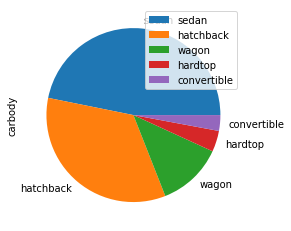

In [58]:
# create a pie chart of the different carbodys

car_body_types = pd.DataFrame(df_basic_and_engine['carbody'].value_counts())
car_body_types.index.name = "body_type"
car_body_types.plot.pie(y='carbody', labels=car_body_types.index)
car_body_types

<AxesSubplot:>

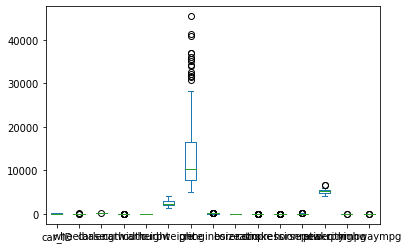

In [60]:
# create box plots for all columns in one graph  

df_basic_and_engine.plot.box()

In [61]:
df_basic_and_engine.dtypes

car_ID                int64
make                 object
model                object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
price               float64
enginetype           object
fueltype             object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

<AxesSubplot:>

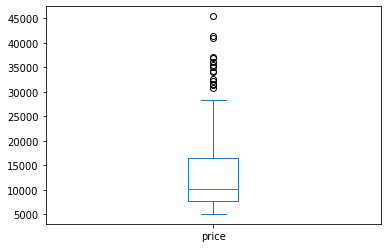

In [62]:
# create a box plot for only the price column

df_basic_and_engine['price'].plot.box()


<AxesSubplot:>

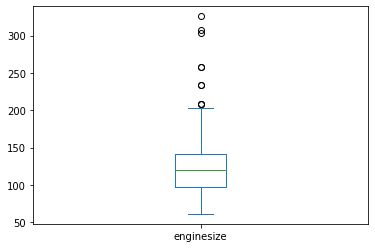

In [63]:
# create a box plot for only the enginesize column

df_basic_and_engine['enginesize'].plot.box()


<AxesSubplot:xlabel='make'>

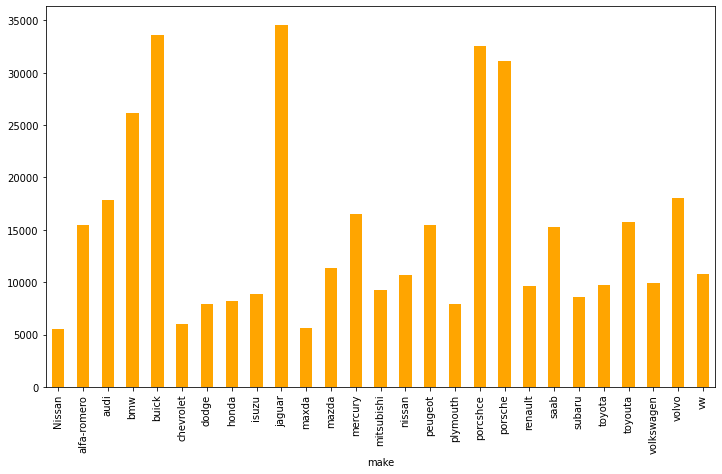

In [68]:
# create a bar chart for each make against its mean(average) price

make_averages = df_basic_and_engine.groupby(['make']).mean()
make_averages['price'].plot.bar(figsize=(12,7), color='orange')
# make_averages['price'].plot.bar(figsize=(12,7), color='orange')
# make_averages

In [69]:
# generate a correlation matrix for all the columns in the df_basic_and_engine dataframe

column_correlation_table = df_basic_and_engine.corr()
column_correlation_table

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,price,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.109093,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.577816,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.682920,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.759325,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.119336,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.835305,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
price,-0.109093,0.577816,0.682920,0.759325,0.119336,0.835305,1.000000,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,0.874145,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.553173,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.079443,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931


# Extra

In [27]:
import scipy.stats as st

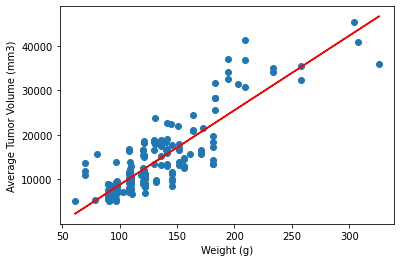

In [29]:
# creating a linear regression model to predict car price from the enginesize(more on this later)
x = df_basic_and_engine['enginesize']
y = df_basic_and_engine['price']
model = st.linregress(x, y)
y_values = x*model[0]+model[1]
plt.scatter(x,y)
plt.plot(x,y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()